# Lecture 6
1. Logarithmic Transformation
2. Standardization and Scaling
3. Polynomial Regression


## 1. Logarithmic Transformation
One of the principal tenets of the linear regression model is the idea that the relationship between the variables at play is linear. 

In cases when that is not necessarily true, we can apply transformation to the data that result in having a linear relationship. 

Once the linear model is obtained, we can then undo the transformation to obtain our final model.

A typical transformation that is often used is applying a **logarithm** to *either one* or *both* of the dependent and response variables.

In [14]:
import pandas as pd   # pandas is a module for data reading

mammals = pd.read_csv('./mammals.csv')     # csv is a common format for data storage

print(type(mammals))


<class 'pandas.core.frame.DataFrame'>


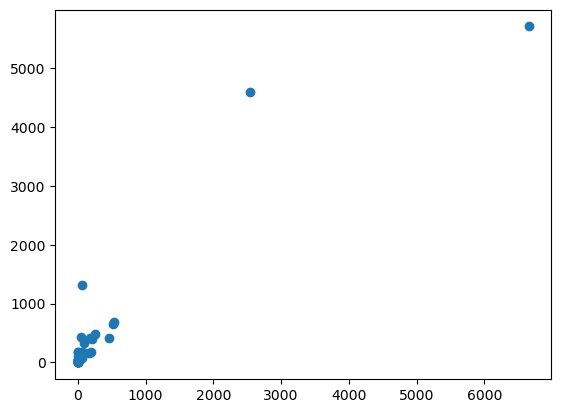

In [16]:
import matplotlib.pyplot as plt

body_data = mammals['body']
brain_data = mammals['brain']

plt.scatter(body_data, brain_data)
plt.show()

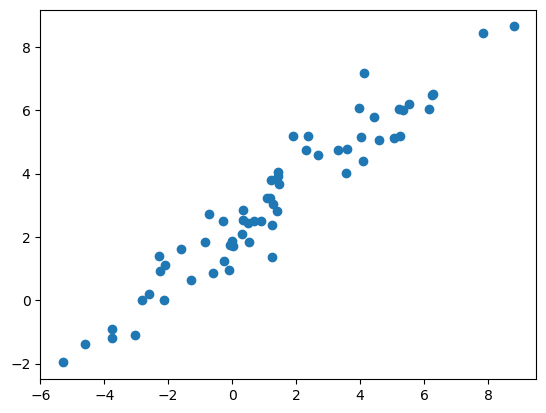

In [17]:
import numpy as np

log_body_data = np.log(body_data)
log_brain_data = np.log(brain_data)

plt.scatter(log_body_data, log_brain_data)
plt.show()

The transformation has helped us convert our problem into a simpler one. In this case, the relationship we see in this data may be modelled as a power law, i.e., $y=x^b$. With some middle school math:
$$\begin{aligned}
\log(y)&=\log(x^b) \\ 
\log(y)&=b \log(x) \\ 
\bar{y} &=b \bar{x} 
\end{aligned}$$


This plot is called a *log-log plot*. There is also *semi-log plot*. Read after class. 

We can bulid a linear model from here.

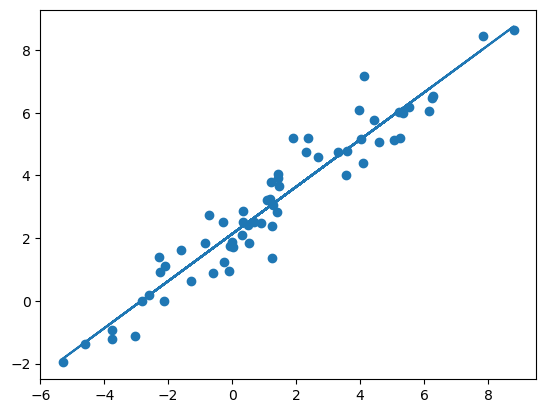

In [21]:
from scipy import stats

beta_1, beta_0, r, p, std_err = stats.linregress(log_body_data, log_brain_data)

def myfunc(x):
  return beta_0 + beta_1 * x

mymodel = list(map(myfunc, log_body_data))

plt.scatter(log_body_data, log_brain_data)
plt.plot(log_body_data, mymodel)
plt.show()

What does this mean on the original data? 

$$ \begin{aligned} 
\log(Brain) &= \beta_0 + \beta_1 \log(Body) \\
Brain &= e^{\beta_0 + \beta_1 \log(Body)}\\
Brain &= e^{\beta_0} e^{\beta_1 \log(Body)}\\
Brain &= e^{\beta_0} {Body}^{\beta_1}
\end{aligned}
$$ 

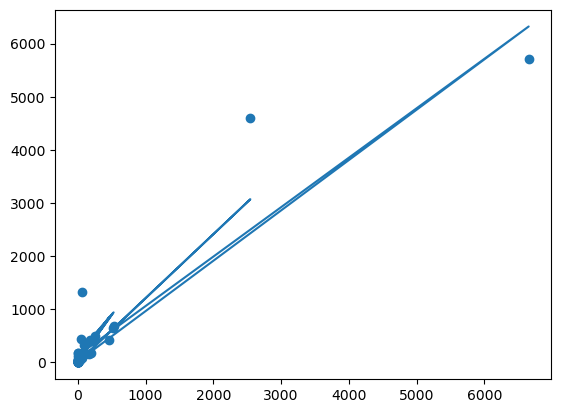

In [24]:
def myfunc_powered(x):
    return np.exp(beta_0) * (x**beta_1)

mymodel_powered = list(map(myfunc_powered, body_data))

plt.plot(body_data, mymodel_powered)

plt.scatter(body_data, brain_data)
plt.show()

Wait a second, why does look so weird?

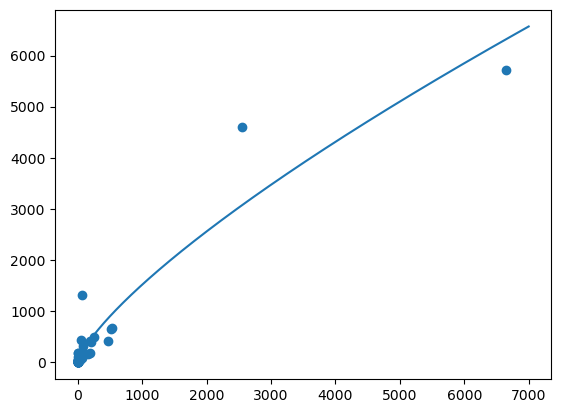

In [27]:
def myfunc_powered(x):
    return np.exp(beta_0) * (x**beta_1)

mymodel_powered = list(map(myfunc_powered, range(7000)))

plt.plot(range(7000), mymodel_powered)

plt.scatter(body_data, brain_data)
plt.show()

## 2. Standardization and Scaling

there are many more tricks to pre-process the data in order to facilitate our modelling.

One of those techniques consists on centring the independent variables such that their mean is zero. 

Another useful transformation is the scaling of our variables. This is convenient in cases where we have features that have very different scales, where some variables have large values and others have very small ones.

### Normalization or Unit Scaling
The aim of this transformation is to convert the range of a given variable into a scale that goes from 0 to 1.

$$f_{scaled}=\frac{f-f_{min}}{f_{max}-f_{min}}$$
where $f_{min}$ and $f_{max}$ are the minimal and maximal values of this feature in dataset.

In [31]:
mammals[['body', 'brain']]

,body,brain
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [39]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler() #preprocessing the data to put it into the normalization scale btw 0-1

scaler.fit_transform(mammals[['body', 'brain']])  # Scaling applied to each column / each field 'body' 'brain' have a min/max and each column will be adjusted to fit the scale 0-1


array([[5.07965515e-04, 7.76629679e-03],
       [7.13856863e-05, 2.68914154e-03],
       [2.02134207e-04, 1.39359158e-03],
       [6.98820784e-02, 7.40319266e-02],
       [5.45912643e-03, 2.08968707e-02],
       [4.15614980e-03, 2.01090363e-02],
       [2.22798484e-03, 1.71677877e-02],
       [1.55545653e-04, 9.38398350e-04],
       [6.28945468e-04, 1.01298001e-02],
       [6.31199753e-05, 1.09596524e-03],
       [1.44274229e-05, 6.75786872e-04],
       [1.37511375e-04, 9.73413214e-04],
       [1.49534227e-04, 1.13098010e-03],
       [0.00000000e+00, 0.00000000e+00],
       [8.26571105e-06, 1.50563914e-04],
       [5.25248366e-04, 1.86629224e-03],
       [2.99819883e-04, 2.12890372e-03],
       [2.54734186e-04, 1.07845781e-03],
       [3.82776813e-01, 8.05842580e-01],
       [2.70514180e-06, 2.80118910e-05],
       [2.81176947e-02, 7.33316293e-02],
       [7.82980751e-02, 1.14649169e-01],
       [1.17222811e-04, 5.88249712e-04],
       [1.50210513e-03, 2.01090363e-02],
       [4.951912

### z-Score Scaling
An alternative method for scaling our features consists of taking into account how far away data points are from the mean.
$$f_{z-score}=\frac{f-\mu_f}{\sigma_f}$$
where $\mu_f$ is the mean and $\sigma_f$ is the standard deviation of this feature.

In [41]:
scaler2 = preprocessing.StandardScaler() #rescales so the mean is 0 and the std. dev. is 1 to make a standard normal distribution of the data

scaler2.fit_transform(mammals[['body','brain']])

array([[-0.21909403, -0.25861303],
       [-0.22235121, -0.29004096],
       [-0.22137574, -0.2980605 ],
       [ 0.29848279,  0.1515756 ],
       [-0.18215509, -0.17733391],
       [-0.19187616, -0.18221066],
       [-0.20626155, -0.20041718],
       [-0.22172332, -0.30087818],
       [-0.21819144, -0.24398279],
       [-0.22241287, -0.29990283],
       [-0.22277615, -0.30250376],
       [-0.22185786, -0.30066143],
       [-0.22176817, -0.29968608],
       [-0.22288379, -0.30668693],
       [-0.22282212, -0.30575492],
       [-0.21896509, -0.29513445],
       [-0.22064694, -0.29350887],
       [-0.2209833 , -0.3000112 ],
       [ 2.63288473,  4.68153196],
       [-0.22286361, -0.30651353],
       [-0.01310717,  0.14724071],
       [ 0.3612717 ,  0.40299901],
       [-0.22200923, -0.30304562],
       [-0.21167709, -0.18221066],
       [-0.21918934, -0.27909537],
       [-0.22266515, -0.30142004],
       [-0.22130846, -0.28787352],
       [ 0.37024155,  0.43009205],
       [ 0.00920532,

## 3. Polynomial Regression
In the previous section we have seen how a simple transformation in the input and output variables make a complex model into a simpler one. In fact, we can try fitting different models using more and more complex functions. 

One important point to note is that a model is said to be linear when it is linear in the **parameters**. 

With that in mind, the 1-variable model
$$ y=\beta_0+\beta_1 x + \beta_2 x^2 +\varepsilon$$
and multivariate model 
$$ y=\beta_0 + \beta_1 x_1 +\beta_2 x_2 +\beta_{11} x_1^2 + \beta_{22} x_2^2 + \beta_{12}x_1x_2+\varepsilon$$
are both linear as the parameters $\beta_{i}$ are linear.

In the examples above, the models are given by second order polynomials in one and two variables. When using such models to fit our data, they are called *polynomial regression* and in general the $k$-th order polynomial model in one variable is given by
$$ y=\beta_0+\beta_1 x + \beta_2 x^2 + ... + \beta_k x^k+\varepsilon.$$
* Linear regression is first order polynomial regression.

Polynomial models can be very useful in cases where we know that nonlinear effects are present in the target variable.

The polynomial model is effectively the [Taylor expansion](https://en.wikipedia.org/wiki/Taylor_series) of an unknown function and thus can be used to approximate it.

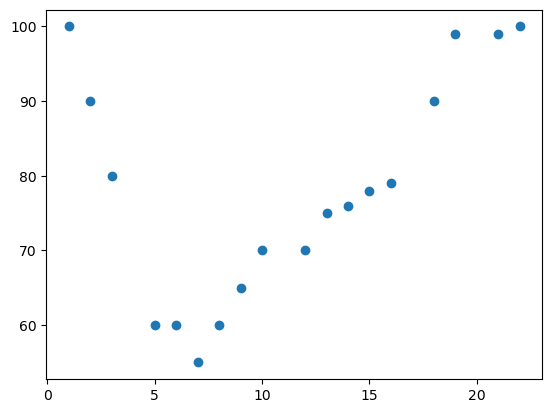

In [101]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

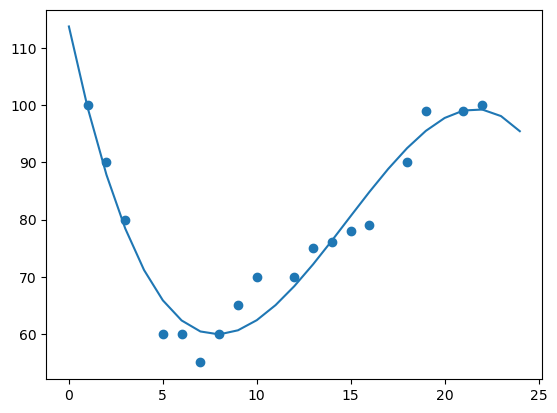

In [103]:
import numpy
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) #poly1d takes the coefficient of each beta (it takes the output of polyfit)
                                    #order 3 makes a better curver than order 2
plt.scatter(x, y)
plt.plot(range(25), mymodel(range(25))) #plot 25 points
plt.show()

In [105]:
numpy.polyfit(x, y, 3) #returns beta 1, 2, 3 - which are the coefficients for each polynomial term in the model

array([-3.03208795e-02,  1.34333191e+00, -1.55383039e+01,  1.13768037e+02])

### R-Squared ($R^2$) Score
It is important to know how well the relationship between the values of the x- and y-axis is, if there are no relationship the polynomial regression can not be used to predict anything.

The relationship is measured with a value called the R-squared.

The r-squared value ranges from 0 to 1, where 0 means no relationship, and 1 means 100% related.

Python and the Sklearn module will compute this value for you, all you have to do is feed it with the x and y arrays:

In [108]:
from sklearn.metrics import r2_score

print(r2_score(y, mymodel(x)))

0.9432150416451026


Bad fit?

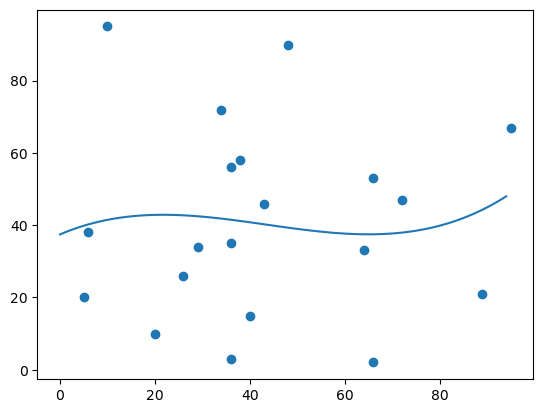

In [111]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))


plt.scatter(x, y)
plt.plot(range(95), mymodel(range(95)))
plt.show()

In [113]:
print(r2_score(y, mymodel(x)))

0.009952707566680541
